In [16]:
from __future__ import print_function, division
import time,os,sys,datetime

import IPython
import IPython.display

#Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
#import seaborn as sns
plt.style.use('ggplot')
rcParams['figure.figsize'] = (14, 14)
mpl.rcParams['axes.grid'] = False
%matplotlib inline
import numpy
#Computation tools
import pandas as pd
import random
import math
import numpy as np
from six import iteritems
import sklearn
import torch
import torch.nn as nn
import mat73
import scipy.io as sio
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.io import savemat

from sklearn.linear_model import LogisticRegression
from pickle import dump

from torch.utils.data import Dataset
from torch.utils.data import DataLoader 
import torch.nn.functional as F
#Printing out the Versions of libraries 
print('Python Version: {}'.format(sys.version))
print('Torch Version: {}'.format(torch.__version__))
print('Matplotlib Version: {}'.format(mpl.__version__))
print('Numpy Version: {}'.format(np.__version__))
print('sklearn Version: {}'.format(sklearn.__version__))
print('Pandas Version: {}'.format(pd.__version__))
#print('Seaborn Version: {}'.format(sns.__version__))
import warnings
warnings.filterwarnings('ignore')
import joblib
#from sklearn.externals import joblib

import pandas as pd

Python Version: 3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]
Torch Version: 2.2.0
Matplotlib Version: 3.7.1
Numpy Version: 1.25.2
sklearn Version: 1.2.0
Pandas Version: 1.5.2


In [17]:
from os.path import dirname, join as pjoin

import scipy.io as sio

In [18]:
import multiprocessing as mp
import psutil
import sys
import os

print('ok')

ok


In [19]:
torch.manual_seed(0)
np.random.seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [20]:
batch_size = 8
copyies=1
dim_model = 256
dropout_p = 0.0
learning_rate = 0.00005
no_of_epoch = 200

In [21]:
# Load data_tuples from a file
import pickle
with open('/home/spt/Documents/hemant_cyclone_prediction/python code/data_making/data_tuples_3hr.pkl', 'rb') as f:
    data_tuples = pickle.load(f)
print("data_tuples loaded successfully")


data_tuples loaded successfully


In [22]:
print(data_tuples[0][0])

amphan


In [23]:
# /home/spt/Documents/hemant_cyclone_prediction/python_data/prediction_data_cyclone_wise/3hr-20241208T050851Z-002/3hr/data_tuples-001.pkl

In [24]:
import numpy as np

# Data variable names
data_variable_names = [
     'asani', 'chapala', 'gaja', 'hamoon', 'helen', 'hudhud', 'kyaar', 'lehar',
    'luban', 'megh', 'mekunu', 'mocha', 'nivar', 'ockhi', 'phailin', 'tej','fani','nisarga',
    'titli',  'yass','bulbul', 'mora',  'taukate', 'biparjoy', 'burevi', 'daye', 'gati',
    'hikka', 'michaung', 'midhil', 'vardah', 'pawan', 'phethai', 'sagar', 'vayu','chapala', 'nivar', 'phethai', 'maha', 'nilofar'
]


# Manually assign test names
test_names = ['amphan']
train_names = [name for name in data_variable_names if name not in test_names]

print(f"Testing datasets: {test_names}")
print(f"Training datasets: {train_names}")

# Initialize training and testing data
X_train, Y_train, YY_train,XX_train = [], [], [], []
X_test, Y_test, YY_test,XX_test  = [], [], [], []

# Use data_tuples to fetch data
for var_name, X, Y, YY,XX in data_tuples:
    # Assign to training or testing set
    if var_name in test_names:
        X_test.append(X)
        Y_test.append(Y)
        YY_test.append(YY)
        XX_test.append(XX)
    else:
        X_train.append(X)
        Y_train.append(Y)
        YY_train.append(YY)
        XX_train.append(XX)

# Concatenate all arrays into single training/testing arrays

X_train = np.concatenate([y for y in X_train if y.size > 0], axis=0)
Y_train = np.concatenate([y for y in Y_train if y.size > 0], axis=0)
YY_train = np.concatenate([y for y in YY_train if y.size > 0], axis=0)
XX_train = np.concatenate([y for y in XX_train if y.size > 0], axis=0)

X_test = np.concatenate([y for y in X_test if y.size > 0], axis=0)
Y_test = np.concatenate([y for y in Y_test if y.size > 0], axis=0)
YY_test = np.concatenate([y for y in YY_test if y.size > 0], axis=0)
XX_test = np.concatenate([y for y in XX_test if y.size > 0], axis=0)
# Print shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"YY_train shape: {YY_train.shape}")
print(f"XX_train shape: {XX_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")
print(f"YY_test shape: {YY_test.shape}")
print(f"XX_test shape: {XX_test.shape}")

Testing datasets: ['amphan']
Training datasets: ['asani', 'chapala', 'gaja', 'hamoon', 'helen', 'hudhud', 'kyaar', 'lehar', 'luban', 'megh', 'mekunu', 'mocha', 'nivar', 'ockhi', 'phailin', 'tej', 'fani', 'nisarga', 'titli', 'yass', 'bulbul', 'mora', 'taukate', 'biparjoy', 'burevi', 'daye', 'gati', 'hikka', 'michaung', 'midhil', 'vardah', 'pawan', 'phethai', 'sagar', 'vayu', 'chapala', 'nivar', 'phethai', 'maha', 'nilofar']
X_train shape: (5742, 48, 128, 128)
Y_train shape: (5742, 128, 128)
YY_train shape: (5742,)
XX_train shape: (5742, 48)
X_test shape: (167, 48, 128, 128)
Y_test shape: (167, 128, 128)
YY_test shape: (167,)
XX_test shape: (167, 48)


In [25]:
np.savez("test_data.npz", X_test=X_test, Y_test=Y_test, YY_test=YY_test, XX_test=XX_test)
print("Arrays saved successfully.")


Arrays saved successfully.


In [26]:
# Load the saved arrays
loaded_data = np.load("test_data.npz")

# Extract the arrays
X_test_loaded = loaded_data["X_test"]
Y_test_loaded = loaded_data["Y_test"]
YY_test_loaded = loaded_data["YY_test"]
XX_test_loaded = loaded_data["XX_test"]

# Print shapes to verify
print(f"Loaded X_test shape: {X_test_loaded.shape}")
print(f"Loaded Y_test shape: {Y_test_loaded.shape}")
print(f"Loaded YY_test shape: {YY_test_loaded.shape}")
print(f"Loaded XX_test shape: {XX_test_loaded.shape}")


Loaded X_test shape: (167, 48, 128, 128)
Loaded Y_test shape: (167, 128, 128)
Loaded YY_test shape: (167,)
Loaded XX_test shape: (167, 48)


In [27]:
class AllLoss(nn.Module):
    def __init__(self, eps=1e-7):
        super().__init__()
        self.eps = eps
        
        self.mse = nn.MSELoss()
        self.mae=nn.L1Loss()
        self.KLD=nn.KLDivLoss(reduction="batchmean")
        
    def rmse(self,a,b):
        return torch.sqrt(self.mse(a,b) + self.eps)  

        
    def forward(self,yhat,y):
        #RMSE_loss = torch.sqrt(self.mse(yhat,y) + self.eps)
        RMSE_loss = self.rmse(yhat,y)
        MSE_Loss= self.mse(yhat,y)
        MAE_Loss=self.mae(yhat,y)
        #KLD_Loss_softmax=self.KLD(F.softmax(yhat),F.softmax(y))
        return [RMSE_loss,MSE_Loss,MAE_Loss]

In [28]:
loss_fn = AllLoss()

In [29]:
class timeseries(Dataset):
    def __init__(self, x, y,xx, transform=None):
        x = torch.tensor(x, dtype=torch.float32) 
        xx = torch.tensor(xx, dtype=torch.float32) # Shape: [175, 280, 2821]
        #x = x.permute(2, 0, 1)  # Change shape to [2821, 175, 280]
        #x = x.unsqueeze(1)  # Add channel dimension: [2821, 1, 175, 280]
        
        self.x = x
        self.xx = xx
        self.y = torch.tensor(y, dtype=torch.float32)  # Change dtype to float for regression
        self.len = x.shape[0]
        self.transform = transform

    def __getitem__(self, idx):
        img = self.x[idx]
        if self.transform:
            img = self.transform(img)
        return img, self.y[idx],self.xx[idx]

    def __len__(self):
        return self.len

In [30]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),  # Rotating by 30 degrees
    transforms.RandomResizedCrop(size=(128, 128), scale=(1.0, 1.0))  # Random zoom (you can adjust the size)
])

In [31]:
batch_size=64
t_dataset = timeseries(torch.Tensor(X_train),torch.tensor(YY_train),torch.tensor(XX_train))
v_dataset = timeseries(torch.Tensor(X_test),torch.tensor(YY_test),torch.tensor(XX_test))
train_dataloader = DataLoader(t_dataset,shuffle=True,batch_size=batch_size)   
val_dataloader = DataLoader(v_dataset,shuffle=False,batch_size=batch_size) 

t_dataset_1 = timeseries(torch.Tensor(X_train),torch.tensor(YY_train),torch.tensor(XX_train), transform=transform)
# v_dataset_1 = timeseries(torch.Tensor(X_test),torch.tensor(YY_test),torch.tensor(XX_test))
train_dataloader_1 = DataLoader(t_dataset_1,shuffle=True,batch_size=batch_size)   
# val_dataloader = DataLoader(v_dataset_1,shuffle=False,batch_size=batch_size) 
del t_dataset,v_dataset

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SAM(nn.Module):
    def __init__(self, bias=False):
        super(SAM, self).__init__()
        self.bias = bias
        self.conv = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=7, stride=1, padding=3, dilation=1, bias=self.bias)

    def forward(self, x):
        max = torch.max(x,1)[0].unsqueeze(1)
        avg = torch.mean(x,1).unsqueeze(1)
        concat = torch.cat((max,avg), dim=1)
        output = self.conv(concat)
        output = output * x
        return output

class CAM(nn.Module):
    def __init__(self, channels, r):
        super(CAM, self).__init__()
        self.channels = channels
        self.r = r
        self.linear = nn.Sequential(
            nn.Linear(in_features=self.channels, out_features=self.channels//self.r, bias=True),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=self.channels//self.r, out_features=self.channels, bias=True))
                # multiple linear layer are possible 
    def forward(self, x):
        max = F.adaptive_max_pool2d(x, output_size=1)
        avg = F.adaptive_avg_pool2d(x, output_size=1)
        b, c, _, _ = x.size()
        linear_max = self.linear(max.view(b,c)).view(b, c, 1, 1)
        linear_avg = self.linear(avg.view(b,c)).view(b, c, 1, 1)
        output = linear_max + linear_avg # bmm is possible instead of adding 
        output = F.sigmoid(output) 
        return output

class CBAM(nn.Module):
    def __init__(self, channels, r):
        super(CBAM, self).__init__()
        self.channels = channels
        self.r = r
        self.sam = SAM(bias=False)
        self.cam = CAM(channels=self.channels, r=self.r)

    def forward(self, x):
        output = self.cam(x) # parallel connection is possible, two other type adding possible
        output = self.sam(output)
        return output + x
        
class Skip2IdentityBlock(nn.Module):
    def __init__(self, filters):
        super(Skip2IdentityBlock, self).__init__()
        self.conv1 = nn.Conv2d(filters, filters, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(filters)
        self.conv2 = nn.Conv2d(filters, filters, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(filters)
        self.dropout = nn.Dropout(0.0)

    def forward(self, x):
        x_skip = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += x_skip
        return F.relu(x)

class Skip2ConvBlock(nn.Module):
    def __init__(self, in_filters, out_filters):
        super(Skip2ConvBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_filters, out_filters, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(out_filters)
        self.conv2 = nn.Conv2d(out_filters, out_filters, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_filters)
        self.skip_conv = nn.Conv2d(in_filters, out_filters, kernel_size=1, stride=2, padding=0)
        self.skip_bn = nn.BatchNorm2d(out_filters)
        self.dropout = nn.Dropout(0.0)

    def forward(self, x):
        x_skip = self.skip_conv(x)
        x_skip = self.skip_bn(x_skip)
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += x_skip
        return F.relu(x)

class ResNet18(nn.Module):
    def __init__(self, input_shape, output_shape):
        super(ResNet18, self).__init__()
        # self.init_norm = InitNormalize()
        self.conv1 = nn.Conv2d(48, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(128, 48, kernel_size=3, stride=1, padding=1)
        
        # Building the layers
        self.layer1 = nn.Sequential( Skip2IdentityBlock(64), Skip2IdentityBlock(64))
        self.layer2 = nn.Sequential(CBAM(64,64), Skip2ConvBlock(64, 128), Skip2IdentityBlock(128))
        self.layer3 = nn.Sequential(CBAM(128,128), Skip2ConvBlock(128, 256), Skip2IdentityBlock(256))
        self.layer4 = nn.Sequential(CBAM(256,256), Skip2ConvBlock(256, 512), Skip2IdentityBlock(512))

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, output_shape)

    def forward(self, x):
        # x = self.init_norm(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)
        #print(x.shape)
        x = self.layer1(x)
        x = self.layer2(x)
        #x = self.layer3(x)
        #x = self.layer4(x)
        x = self.conv2(x)
        #print(x.shape)
        return x

# Example usage
input_shape = (48, 128, 128)  # Modify as needed
output_shape = 1  # Modify as needed
model1 = ResNet18(input_shape, output_shape).to(device)
model1

ResNet18(
  (conv1): Conv2d(48, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer1): Sequential(
    (0): Skip2IdentityBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (1): Skip2IdentityBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Optional


class Attention(nn.Module):
    def __init__(self, dim: int, chan: int, num_heads: int=1, qkv_bias: bool=False, qk_scale: Optional[float]=None):
      
        super().__init__()

        
        self.num_heads = num_heads
        self.chan = chan
        self.head_dim = self.chan // self.num_heads
        self.scale = qk_scale or self.head_dim ** -0.5

        
        self.qkv = nn.Linear(dim, chan * 3, bias=qkv_bias)  
        self.proj = nn.Linear(chan, chan)  

    def forward(self, x):
        B, N, C = x.shape 

        
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        
        attn = (q * self.scale) . k.transpose(-2, -1)
        attn = attn.softmax(dim=-1)

        
        x = (attn @ v).transpose(1, 2).reshape(B, N, self.chan)
        
        
        x = self.proj(x)

        
        x = v.transpose(1, 2).reshape(B, N, self.chan) + x
        return x


class NeuralNet(nn.Module):
    def __init__(self, in_chan: int, hidden_chan: Optional[float]=None, out_chan: Optional[float]=None, act_layer=nn.GELU):
       
        super().__init__()

        hidden_chan = hidden_chan or in_chan
        out_chan = out_chan or in_chan

        self.fc1 = nn.Linear(in_chan, hidden_chan)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_chan, out_chan)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x


class TokenTransformer(nn.Module):
    def __init__(self, dim: int, chan: int, num_heads: int, hidden_chan_mul: float=1., qkv_bias: bool=False, qk_scale: Optional[float]=None, act_layer=nn.GELU, norm_layer=nn.LayerNorm):
       
        super().__init__()

        
        self.norm1 = norm_layer(dim)
        self.attn = Attention(dim, chan, num_heads, qkv_bias, qk_scale)
        self.norm2 = norm_layer(chan)
        self.neuralnet = NeuralNet(chan, int(chan * hidden_chan_mul), chan, act_layer)
        self.intensityemb = nn.Linear( 1,8)
        
        self.regressor = nn.Linear(chan, 1)

    def forward(self, x,y):
        #print(x.shape,y.shape)
        #x = self.attn(self.norm1(x))
        x = self.attn(self.norm1(torch.cat((x,self.intensityemb(y.unsqueeze(2))), dim=2)))
        x = x + self.neuralnet(self.norm2(x))

        
        intensity = self.regressor(x.mean(dim=1))  
        return intensity


model2 = TokenTransformer(
    dim=16*16+8,  
    chan=256,     
    num_heads=8,  
    hidden_chan_mul=2.0,
    qkv_bias=True
).to(device)



# # Define loss function and optimizer for regression
# criterion = nn.MSELoss()  # Mean Squared Error for regression
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [34]:
def train(model1, model2,dataloader, loss_fn, optimizer, device):
    model1.train()
    model2.train()
    running_loss = 0.0
    
    for i, (images, intensities, old_intensities) in enumerate(dataloader):
        images, intensities, old_intensities = images.to(device), intensities.to(device), old_intensities.to(device)
        optimizer.zero_grad()
        # Forward pass
        #print("hello")
        #print(images.shape)
        #print("hello")
        # print(torch.isnan(images).any())
        #images = 255 - images
        #images =images /256
        # mask0 = torch.tensor(images)> 50
        # mask1 = torch.tensor(images)> 100
        # mask2 = torch.tensor(images)> 150
        # mask3 = torch.tensor(images)> 200
        # mask4 = torch.tensor(images)> 250
        # images=torch.concat((images,mask0*images,mask1*images,mask2*images,mask3*images,mask4*images),1)
        #print(images.shape)
        #binary_tensor = np.unpackbits(tensor[..., np.newaxis], axis=-1)  # Shape: (64, 48, 128, 256, 8)

        # Rearrange axes to desired shape: (64, 48, 8, 128, 256)
        #output_tensor = np.transpose(binary_tensor, (0, 1, 4, 2, 3))
        #images= images.unsqueeze(2)
        #print(images.shape)
        outputs = model1(images)
        #print(outputs.shape)
        #print(outputs.shape)
        B, T, H, W = outputs.shape
        outputs = outputs.view(B, T, -1)
        #print(outputs.shape)
        #print(images.shape)
        outputs = model2(outputs,old_intensities)
        
        # outputs = outputs.view(-1)  # Flatten the output to match the intensity shape
        loss = loss_fn(outputs.squeeze(), intensities)
        #loss = loss_fn(outputs, intensities/max_in)
        #print(outputs,intensities,outputs-intensities)
        # Backward pass and optimization
        # print(torch.isnan(intensities).any())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / (len(dataloader))
    scheduler.step() 
    return epoch_loss

In [35]:
def test(model1,model2, dataloader, loss_fn, device):
    model1.eval()
    model2.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, intensities, old_intensities in dataloader:
            images, intensities, old_intensities = images.to(device), intensities.to(device), old_intensities.to(device)
            #images = 255 - images
            #images=images/256
            #outputs = model(images)
            # mask0 = torch.tensor(images)> 50
            # mask1 = torch.tensor(images)> 100
            # mask2 = torch.tensor(images)> 150
            # mask3 = torch.tensor(images)> 200
            # mask4 = torch.tensor(images)> 250
            # images=torch.concat((images,mask0*images,mask1*images,mask2*images,mask3*images,mask4*images),1)
        #print(images.shape)
            outputs = model1(images)
        #print(outputs.shape)
        #print(outputs.shape)
            B, T, H, W = outputs.shape
            outputs = outputs.view(B, T, -1)
        #print(outputs.shape)
        #print(images.shape)
            outputs = model2(outputs,old_intensities)
        
            outputs = outputs.view(-1)  # Flatten the output to match the intensity shape
            loss = loss_fn(outputs, intensities)
            
            #loss = loss_fn(outputs, intensities/max_in)
            #loss = loss_fn(outputs*man_in, intensities)
            running_loss += loss.item()
    
    epoch_loss = running_loss / (len(dataloader))
    return epoch_loss

In [36]:
file_name_Best_model1 = 'best_model1.pt'
file_name_Best_model2 = 'best_model2.pt'

In [22]:
best_test_acc1,best_test_acc2=10000,10000
best_test_acc=best_test_acc1
best_test_acc1=torch.tensor(best_test_acc1)
best_test_acc2=torch.tensor(best_test_acc2)
best_test_acc=torch.tensor(best_test_acc)
print(best_test_acc1,best_test_acc2,best_test_acc)

tensor(10000) tensor(10000) tensor(10000)


In [23]:
learning_rate = 0.0005 # Reduced learning rate
weight_decay = 1e-4     # Add weight decay for regularization
no_of_epoch = 500
optimizer = torch.optim.Adam(
    list(model1.parameters()) + list(model2.parameters()),
    lr=learning_rate,
    weight_decay=weight_decay
)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer ,50.0, gamma=0.8)
# Training loop# Create DataLoader instances
for epoch in range(no_of_epoch ):
    train_loss = train(model1, model2,train_dataloader, nn.MSELoss(), optimizer, device)
    train_loss1 = train(model1, model2, train_dataloader_1, nn.MSELoss(), optimizer, device)
    test_loss = test(model1, model2, val_dataloader, nn.MSELoss(), device)
    # test_loss1 = test(model, val_dataloader, nn.MSELoss(), device)
    
    print(f'Epoch {epoch+1}/{no_of_epoch}, LR: {scheduler.get_lr()},Tr Loss : {train_loss:.4f},  Val Loss: {test_loss:.4f}')
    print("best val loss",best_test_acc1)
    if  best_test_acc1 > test_loss:
        torch.save(model1.state_dict(),file_name_Best_model1)
        torch.save(model2.state_dict(),file_name_Best_model2)
        
        best_test_acc2=best_test_acc1
        best_test_acc1=test_loss
        best_test_acc=test_loss
        
        



    # # # Save the model after every few epochs or based on performance criteria
    # if (epoch+1) % 10 == 0:
    #     torch.save(model.state_dict(), f'model_epoch_{epoch+1}.pth')



Epoch 1/500, LR: [0.0005],Tr Loss : 605.7552,  Val Loss: 55.1707
best val loss tensor(10000)
Epoch 2/500, LR: [0.0005],Tr Loss : 20.0293,  Val Loss: 42.9752
best val loss 55.1706976890564
Epoch 3/500, LR: [0.0005],Tr Loss : 17.1572,  Val Loss: 44.4523
best val loss 42.9751710096995
Epoch 4/500, LR: [0.0005],Tr Loss : 13.9848,  Val Loss: 46.2391
best val loss 42.9751710096995
Epoch 5/500, LR: [0.0005],Tr Loss : 10.8834,  Val Loss: 44.1427
best val loss 42.9751710096995
Epoch 6/500, LR: [0.0005],Tr Loss : 10.3198,  Val Loss: 54.5559
best val loss 42.9751710096995
Epoch 7/500, LR: [0.0005],Tr Loss : 10.4990,  Val Loss: 43.7300
best val loss 42.9751710096995
Epoch 8/500, LR: [0.0005],Tr Loss : 8.7356,  Val Loss: 89.7443
best val loss 42.9751710096995
Epoch 9/500, LR: [0.0005],Tr Loss : 8.7989,  Val Loss: 51.8342
best val loss 42.9751710096995
Epoch 10/500, LR: [0.0005],Tr Loss : 7.2443,  Val Loss: 63.5221
best val loss 42.9751710096995
Epoch 11/500, LR: [0.0005],Tr Loss : 6.2566,  Val Loss

In [37]:
model1.load_state_dict(torch.load(file_name_Best_model1))
model2.load_state_dict(torch.load(file_name_Best_model2))

<All keys matched successfully>

Using device: cuda


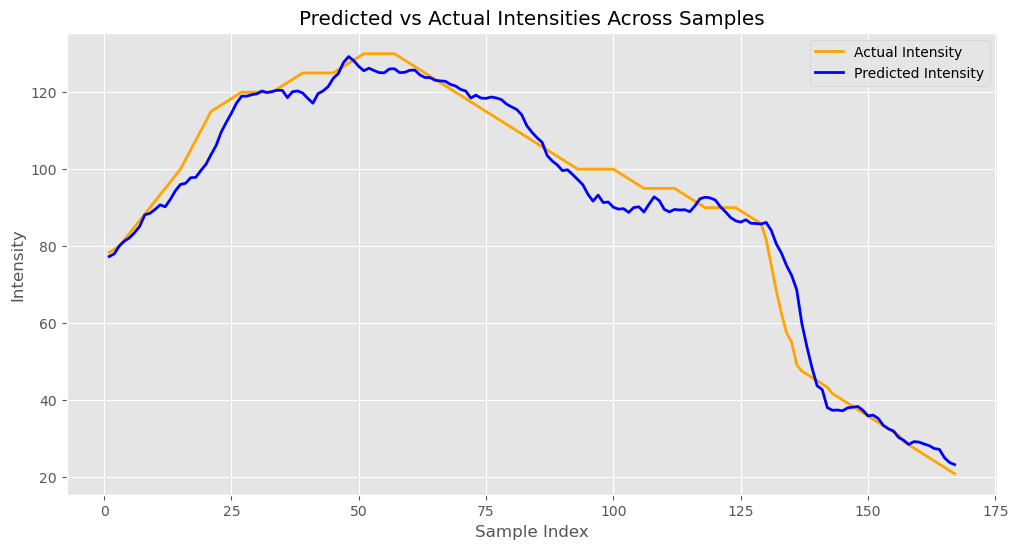

In [38]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define the device (use GPU if available, else fallback to CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model1.load_state_dict(torch.load(file_name_Best_model1))
model2.load_state_dict(torch.load(file_name_Best_model2))
# Move the model to the selected device
model1.to(device)
model1.eval()
model2.to(device)
model2.eval()


# Store predictions and actual values for visualization
all_predictions = []
all_actuals = []

with torch.no_grad():  # No gradient calculation for evaluation
    for images, intensities,old_intensities in val_dataloader:  # Use your test dataloader here
        # Move data to the same device as the model
        images = images.to(device)
        intensities = intensities.to(device)
        old_intensities = old_intensities.to(device)
        # Flatten images for the model
        outputs = model1(images)
        #print(outputs.shape)
        #print(outputs.shape)
        B, T, H, W = outputs.shape
        outputs = outputs.view(B, T, -1)
        #print(outputs.shape)
        #print(images.shape)
        predictions = model2(outputs,old_intensities)


        # Append predictions and actuals for visualization
        all_predictions.extend(predictions.cpu().numpy())  # Move to CPU for NumPy conversion
        all_actuals.extend(intensities.cpu().numpy())

# Convert to NumPy arrays for easier manipulation
all_predictions = np.array(all_predictions)
all_actuals = np.array(all_actuals)

# Create sample indices
sample_indices = np.arange(1, len(all_actuals) + 1)

# Plot actual vs predicted intensities for sample indices
plt.figure(figsize=(12, 6))
plt.plot(sample_indices, all_actuals, label='Actual Intensity', color='orange', linewidth=2)
plt.plot(sample_indices, all_predictions, label='Predicted Intensity', color='blue', linewidth=2)
plt.title('Predicted vs Actual Intensities Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()


Using device: cuda


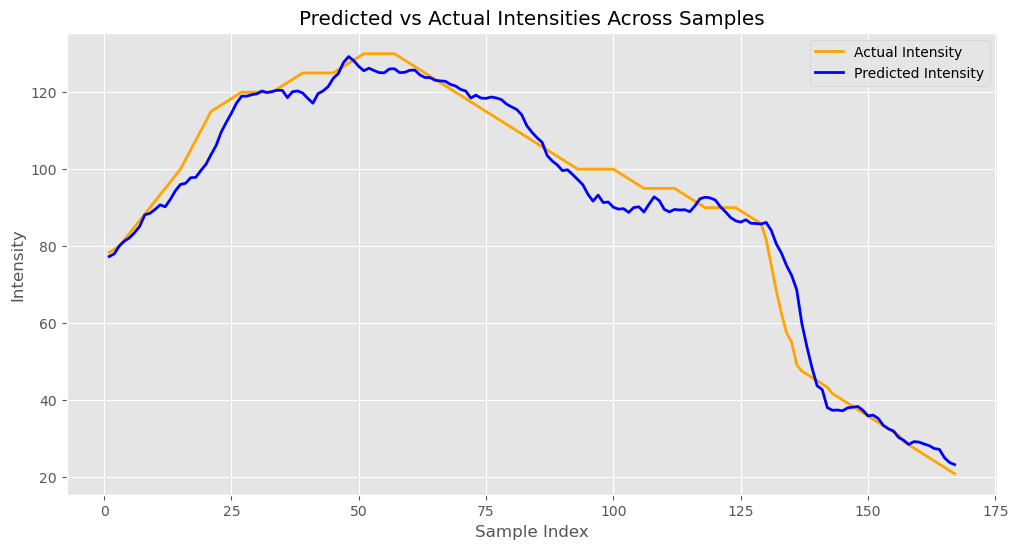

In [25]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define the device (use GPU if available, else fallback to CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model1.load_state_dict(torch.load(file_name_Best_model1))
model2.load_state_dict(torch.load(file_name_Best_model2))
# Move the model to the selected device
model1.to(device)
model1.eval()
model2.to(device)
model2.eval()


# Store predictions and actual values for visualization
all_predictions = []
all_actuals = []

with torch.no_grad():  # No gradient calculation for evaluation
    for images, intensities,old_intensities in val_dataloader:  # Use your test dataloader here
        # Move data to the same device as the model
        images = images.to(device)
        intensities = intensities.to(device)
        old_intensities = old_intensities.to(device)
        # Flatten images for the model
        outputs = model1(images)
        #print(outputs.shape)
        #print(outputs.shape)
        B, T, H, W = outputs.shape
        outputs = outputs.view(B, T, -1)
        #print(outputs.shape)
        #print(images.shape)
        predictions = model2(outputs,old_intensities)


        # Append predictions and actuals for visualization
        all_predictions.extend(predictions.cpu().numpy())  # Move to CPU for NumPy conversion
        all_actuals.extend(intensities.cpu().numpy())

# Convert to NumPy arrays for easier manipulation
all_predictions = np.array(all_predictions)
all_actuals = np.array(all_actuals)

# Create sample indices
sample_indices = np.arange(1, len(all_actuals) + 1)

# Plot actual vs predicted intensities for sample indices
plt.figure(figsize=(12, 6))
plt.plot(sample_indices, all_actuals, label='Actual Intensity', color='orange', linewidth=2)
plt.plot(sample_indices, all_predictions, label='Predicted Intensity', color='blue', linewidth=2)
plt.title('Predicted vs Actual Intensities Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()


Using device: cuda
Length of all_actuals: 167
Length of all_predictions: 167
Length of intensity_differences: 167
Results saved to predicted_vs_actual_intensities_with_difference.csv


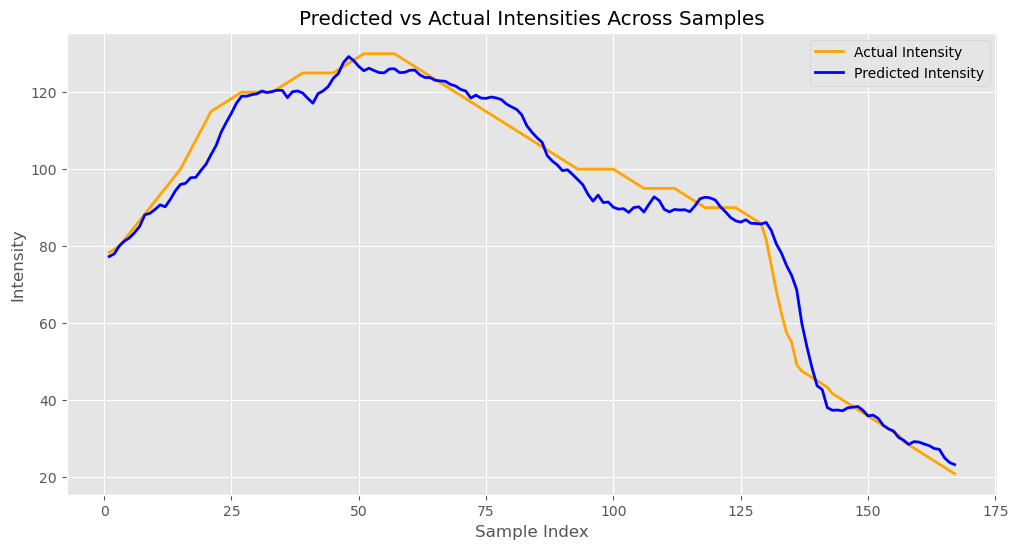

In [26]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Importing pandas for saving data to CSV

# Define the device (use GPU if available, else fallback to CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load model states
model1.load_state_dict(torch.load(file_name_Best_model1))
model2.load_state_dict(torch.load(file_name_Best_model2))

# Move the models to the selected device
model1.to(device)
model1.eval()
model2.to(device)
model2.eval()

# Store predictions and actual values for saving
all_predictions = []
all_actuals = []

with torch.no_grad():  # No gradient calculation for evaluation
    for images, intensities, old_intensities in val_dataloader:  # Use your test dataloader here
        # Move data to the same device as the model
        images = images.to(device)
        intensities = intensities.to(device)
        old_intensities = old_intensities.to(device)

        # Generate model predictions
        outputs = model1(images)
        B, T, H, W = outputs.shape
        outputs = outputs.view(B, T, -1)
        predictions = model2(outputs, old_intensities)

        # Append predictions and actuals for saving and visualization
        all_predictions.extend(predictions.cpu().numpy())  # Move to CPU for NumPy conversion
        all_actuals.extend(intensities.cpu().numpy())

# Convert to NumPy arrays
all_predictions = np.array(all_predictions)
all_actuals = np.array(all_actuals)

# Ensure arrays are flattened
all_predictions = all_predictions.flatten()
all_actuals = all_actuals.flatten()

# Compute the difference
intensity_differences = all_actuals - all_predictions

# Verify lengths
print(f"Length of all_actuals: {len(all_actuals)}")
print(f"Length of all_predictions: {len(all_predictions)}")
print(f"Length of intensity_differences: {len(intensity_differences)}")

# Create a DataFrame to save data
results_df = pd.DataFrame({
    'Actual Intensity': all_actuals,
    'Predicted Intensity': all_predictions,
    'Difference': intensity_differences
})

# Save to CSV
csv_file_name = "predicted_vs_actual_intensities_with_difference.csv"
results_df.to_csv(csv_file_name, index=False)
print(f"Results saved to {csv_file_name}")

# Plot actual vs predicted intensities for sample indices
sample_indices = np.arange(1, len(all_actuals) + 1)  # Generate sample indices
plt.figure(figsize=(12, 6))
plt.plot(sample_indices, all_actuals, label='Actual Intensity', color='orange', linewidth=2)
plt.plot(sample_indices, all_predictions, label='Predicted Intensity', color='blue', linewidth=2)
plt.title('Predicted vs Actual Intensities Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()
